# MNIST Digit Classification with TensorFlow

In this notebook, we’ll learn how to build a neural network to classify handwritten digits from the MNIST dataset using TensorFlow and Keras.

# 🧠 Core Concepts in Neural Networks 

---

## 1. **Layers in Neural Networks**

A **layer** is a collection of neurons that process input data and pass it to the next layer.

* **Input Layer**: Accepts raw input (e.g., 784 pixels for a 28×28 image).
* **Hidden Layers**: Extract features and learn complex patterns.
* **Output Layer**: Produces the final prediction (e.g., 10 classes for digits 0–9).

### How to decide number of layers/neurons?

* **Shallow networks** (1–2 hidden layers) → good for simple datasets like MNIST.
* **Deep networks** (many hidden layers) → needed for complex tasks like image recognition or NLP.
* **Number of neurons**: Often chosen by experimentation. Start with powers of 2 (64, 128, 256).
* Rule of thumb: More neurons = more capacity, but too many → overfitting & slower training.

---

## 2. **Activation Functions**

Activation functions decide how a neuron “fires” by applying a transformation to the weighted sum of inputs. They introduce **non-linearity**, allowing the network to learn complex patterns.

### Common Activation Functions:

1. **Sigmoid**

   $$
   f(x) = \frac{1}{1 + e^{-x}}
   $$

   * Outputs between (0,1).
   * Pros: Useful for probabilities.
   * Cons: Vanishing gradient problem (slows learning in deep networks).
   * Use case: Binary classification (output layer).



2. **Tanh (Hyperbolic Tangent)**

   $$
   f(x) = \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
   $$

   * Outputs between (-1,1).
   * Pros: Centered at 0 → better than sigmoid.
   * Cons: Still suffers from vanishing gradients.
   * Use case: Sometimes used in hidden layers for small networks.



3. **ReLU (Rectified Linear Unit)**

   $$
   f(x) = \max(0, x)
   $$

   * Outputs positive values or 0.
   * Pros: Simple, fast, solves vanishing gradient problem.
   * Cons: “Dead ReLU” problem (neurons stuck at 0).
   * Use case: Most popular in hidden layers.



4. **Leaky ReLU**

   $$
   f(x) = \begin{cases}
   x & \text{if } x > 0 \\
   \alpha x & \text{if } x \leq 0
   \end{cases}
   $$

   * Allows small negative slope ($\alpha \approx 0.01$) instead of 0.
   * Solves “dead ReLU” problem.
   * Use case: Alternative to ReLU when neurons die.


5. **Softmax**

   $$
   f(x_i) = \frac{e^{x_i}}{\sum_{j} e^{x_j}}
   $$

   * Converts outputs into probabilities that sum to 1.
   * Use case: Multi-class classification (e.g., digits 0–9).

---

## 3. **Optimizers**

Optimizers decide **how weights are updated** during training to minimize loss.

### Common Optimizers:

1. **Gradient Descent**

   * Updates weights by moving opposite to gradient.
   * Slow in practice.



2. **SGD (Stochastic Gradient Descent)**

   * Updates weights using small random batches instead of whole dataset.
   * Faster than vanilla gradient descent.
   * Use case: Baseline optimizer.


3. **Momentum**

   * Adds a “velocity” term to SGD → smoother & faster convergence.



4. **Adam (Adaptive Moment Estimation)**

   * Combines momentum + adaptive learning rates.
   * Adjusts learning rate for each parameter individually.
   * Fast, robust, most widely used.
   * Use case: Default choice for most problems.


5. **RMSProp**

   * Keeps moving average of squared gradients.
   * Works well for RNNs.

---

## 4. **Loss Functions**

Loss functions measure **how wrong the model is** → guide optimization.

### Common Loss Functions:

1. **Mean Squared Error (MSE)**

   $$
   L = \frac{1}{n}\sum (y_{true} - y_{pred})^2
   $$

   * Used for regression (predicting numbers).


2. **Binary Crossentropy**

   $$
   L = -\frac{1}{n}\sum \Big[ y\log(p) + (1-y)\log(1-p) \Big]
   $$

   * For binary classification (yes/no).



3. **Categorical Crossentropy**

   $$
   L = -\sum y_i \log(p_i)
   $$

   * Used when labels are one-hot encoded (e.g., `[0,0,1,0,0]`).


4. **Sparse Categorical Crossentropy**

   * Same as above but labels are integers (0–9).
   * Use case: MNIST digit classification.

---

## 5. **Metrics**

Metrics are **performance measures** (not used for training, just reporting).

* **Accuracy**: Fraction of correct predictions.
* **Precision/Recall/F1**: Used when classes are imbalanced.
* **AUC (Area Under Curve)**: Used in binary classification (ROC curve).



## **Code** 

In [2]:
!pip install tensorflow
!pip install matplotlib
!pip install numpy 

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
# Normalize and reshape
x_train = x_train.reshape(-1, 784).astype('float32') / 255.0
x_test = x_test.reshape(-1, 784).astype('float32') / 255.0

In [6]:
#Sanity Check
print(f"Training samples: {x_train.shape}, Test samples: {x_test.shape}")

Training samples: (60000, 784), Test samples: (10000, 784)


In [7]:
# 🔧 Try changing layer sizes and activation functions
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

c:\Users\05den\anaconda3\envs\EpochDevWKS1\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 🔁 Try changing epochs or batch size
history = model.fit(x_train, y_train,
                    validation_split=0.1,
                    epochs=1,
                    batch_size=32)


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8681 - loss: 0.4518 - val_accuracy: 0.9677 - val_loss: 0.1135


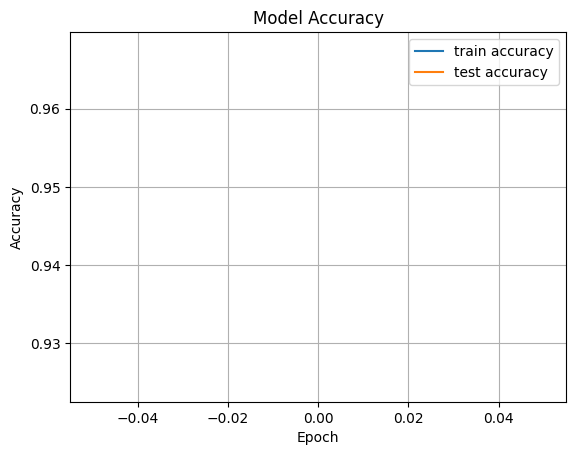

In [9]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='test accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()


In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9529 - loss: 0.1511
Test accuracy: 0.9608


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


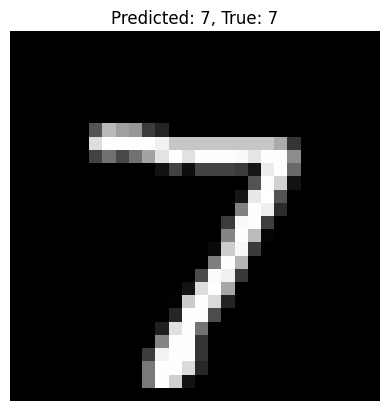

In [11]:
predictions = model.predict(x_test)

def show_prediction(index):
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[index])}, True: {y_test[index]}")
    plt.axis('off')
    plt.show()

# 🔁 Try different indexes!
show_prediction(0)


In [12]:
# Save the trained model
model.save("mnist_digit_classifier.h5")
print("✅ Model saved as mnist_digit_classifier.h5")


✅ Model saved as mnist_digit_classifier.h5


In [13]:

predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
